In [2]:
import polars as pl
import pandas as pd
import numpy as np 
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
from polars import selectors as cs

sns.set_theme(
    context='notebook',
    style='white',
    palette='colorblind',
    rc={
        "figure.figsize": (8, 6),
        "xtick.labelsize": 16,
        "axes.titlesize": 20,
        "axes.labelsize": 16,
        "ytick.labelsize": 12,
        "figure.dpi": 120,
    }
)

sns.set_palette(
    [
        "#000000",
        "#E69F00",
        "#56B4E9",
        "#009E73",
        "#F0E442",
        "#0072B2",
        "#D55E00",
        "#CC79A7",
    ]
)
pl.Config.set_fmt_str_lengths(50)

polars.config.Config

In [ ]:
import os
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")

In [ ]:
concordant_strains = loadmat("data/concordant_strains_ynb.mat", simplify_cells=True)['concordant_strains']
concordant_strains = concordant_strains.astype(str)
concordant_strains.dtype

In [ ]:
ynb_table = pl.read_csv("data/ynb_table.csv")
ynb_table = ynb_table.filter(pl.col('Strain').is_in(concordant_strains))
ynb_table.sample(10)

In [4]:
low_strains = ynb_table.filter(pl.col('Binary_Experimental') == 0)['Strain']
high_strains = ynb_table.filter(pl.col('Binary_Experimental') == 1)['Strain']

In [ ]:
# In case of GIMME

ynb_table = pl.read_csv("data/gimme_growth_comparison_sigma_0.5.csv")
print(ynb_table.shape)
ynb_table = ynb_table.with_columns(
    Growth = pl.col('Experimental').map_elements(lambda x: 'High' if x == 1 else 'Low', return_dtype=pl.Utf8)
)
ynb_table = ynb_table.filter(pl.col('concordance_gimme').is_in([0, 3]))
ynb_table.sample(10)

In [10]:
high_strains = ynb_table.filter(pl.col('Growth') == 'High')['Strain']
low_strains = ynb_table.filter(pl.col('Growth') == 'Low')['Strain']

In [ ]:
pFBA_results = loadmat("results/pFBA_genes_and_reactions_all_gimme.mat", simplify_cells=True)
yeast8_genes = pl.read_csv("data/yeast8_genes.csv")

In [12]:
genes_solution = pFBA_results['gene_class_strains']
genes_solution.keys()

dict_keys(['A01_01', 'A01_02', 'A01_03', 'A01_04', 'A01_05', 'A01_06', 'A01_07', 'A01_08', 'A01_09', 'A01_10', 'A01_11', 'A01_12', 'A01_14', 'A01_15', 'A01_16', 'A01_17', 'A01_18', 'A01_19', 'A01_20', 'A01_21', 'A01_22', 'A01_23', 'A01_24', 'A01_25', 'A01_26', 'A01_27', 'A01_28', 'A01_29', 'A01_30', 'A01_31', 'A01_32', 'A01_33', 'A01_34', 'A01_35', 'A01_36', 'A01_37', 'A01_38', 'A01_39', 'A01_40', 'A01_41', 'A01_42', 'A01_43', 'A01_44', 'A01_45', 'A01_46', 'A01_47', 'A01_48', 'A01_49', 'A01_50', 'A01_51', 'A01_52', 'A01_53', 'A01_54', 'A01_55', 'A01_56', 'A01_57', 'A01_58', 'A01_59', 'A01_60', 'A01_61', 'A01_62', 'A01_63', 'A01_64', 'A01_65', 'A01_66', 'A01_67', 'A01_68', 'A01_69', 'A01_70', 'A01_71', 'A01_72', 'A01_73', 'A01_74', 'A01_75', 'A01_76', 'A01_77', 'A01_79', 'A01_80', 'A01_81', 'A01_83', 'A01_84', 'A01_86', 'A01_87', 'A01_88', 'A01_89', 'A01_90', 'A01_91', 'A01_92', 'A01_93', 'A01_94', 'A01_95', 'A01_96', 'A02_01', 'A02_02', 'A02_03', 'A02_04', 'A02_05', 'A02_06', 'A02_07',

In [13]:
gene_types = ['pFBAEssential',  'pFBAoptima',  'ELEGenes',  'MLEGenes', 'ZeroFluxGenes', 'Blockedgenes']
gene_types

['pFBAEssential',
 'pFBAoptima',
 'ELEGenes',
 'MLEGenes',
 'ZeroFluxGenes',
 'Blockedgenes']

In [14]:
common_genes_high = dict()
common_genes_low = dict()

for gene_type in gene_types:
    result = np.array([])
    for strain in genes_solution.keys():
        if strain in high_strains:
            try:
                result = np.union1d(result, genes_solution[strain][gene_type])
            except:
                print(strain, gene_type)
                continue
    common_genes_high[gene_type] = result

for gene_type in gene_types:
    result = np.array([])
    for strain in genes_solution.keys():
        if strain in low_strains:
            try:
                result = np.union1d(result, genes_solution[strain][gene_type])
            except:
                print(strain, gene_type)
                continue
    common_genes_low[gene_type] = result

A06_25 pFBAEssential
A06_25 pFBAoptima
A06_25 ELEGenes
A06_25 MLEGenes
A06_25 ZeroFluxGenes
A06_25 Blockedgenes


In [15]:
for gene_type in gene_types:
    print(gene_type, len(common_genes_high[gene_type]), len(common_genes_low[gene_type]))

pFBAEssential 279 362
pFBAoptima 360 412
ELEGenes 56 442
MLEGenes 219 586
ZeroFluxGenes 0 1
Blockedgenes 731 775


In [ ]:
for gene_type in gene_types:
    
    with open(f'results/gimme_pfba/sigma_0.5/Union/high_strains-{gene_type}.txt', 'w') as f:
        for gene in common_genes_high[gene_type]:
            f.write(f'{gene}\n')
    
    with open(f'results/gimme_pfba/sigma_0.5/Union/low_strains-{gene_type}.txt', 'w') as f:
        for gene in common_genes_low[gene_type]:
            f.write(f'{gene}\n')

# Intersection of genes

In [17]:
intersection_genes_high = dict()
intersection_genes_low = dict()

for gene_type in gene_types:
    result = yeast8_genes.to_numpy().flatten()
    for strain in genes_solution.keys():
        if strain in high_strains:
            try:
                result = np.intersect1d(result, genes_solution[strain][gene_type])
            except:
                print(strain, gene_type)
                continue
    intersection_genes_high[gene_type] = result
    
for gene_type in gene_types:
    result = yeast8_genes.to_numpy().flatten()
    for strain in genes_solution.keys():
        if strain in low_strains:
            try:
                result = np.intersect1d(result, genes_solution[strain][gene_type])
            except:
                print(strain, gene_type)
                continue
    intersection_genes_low[gene_type] = result

A06_25 pFBAEssential
A06_25 pFBAoptima
A06_25 ELEGenes
A06_25 MLEGenes
A06_25 ZeroFluxGenes
A06_25 Blockedgenes


In [20]:
for gene_type in gene_types:
    print(gene_type, len(intersection_genes_high[gene_type]), len(intersection_genes_low[gene_type]))

pFBAEssential 161 169
pFBAoptima 184 0
ELEGenes 0 0
MLEGenes 4 0
ZeroFluxGenes 0 0
Blockedgenes 446 398


In [ ]:
for gene_type in gene_types:
    
    with open(f'results/gimme_pfba/sigma_0.5/Intersection/intersection_high_strains-{gene_type}.txt', 'w') as f:
        for gene in intersection_genes_high[gene_type]:
            f.write(f'{gene}\n')
    
    with open(f'results/gimme_pfba/sigma_0.5/Intersection/intersection_low_strains-{gene_type}.txt', 'w') as f:
        for gene in intersection_genes_low[gene_type]:
            f.write(f'{gene}\n')

In [21]:
# Repeat previous for reactions

rxn_solution = pFBA_results['rxn_class_strains']
rxn_types = list(rxn_solution['A01_02'].keys())

In [22]:
union_reaction_high = dict()
union_reaction_low = dict()
intersection_reaction_high = dict()
intersection_reaction_low = dict()


for rxn_type in rxn_types:
    result_union = np.array([])
    result_intersection = yeast8_genes.to_numpy().flatten()
    for strain in rxn_solution.keys():
        if strain in high_strains:
            try:
                result_union = np.union1d(result_union, rxn_solution[strain][rxn_type])
                result_intersection = np.intersect1d(result_intersection, rxn_solution[strain][rxn_type])
            except:
                print(strain, rxn_type)
                continue
    union_reaction_high[rxn_type] = result_union
    intersection_reaction_high[rxn_type] = result_intersection

for rxn_type in rxn_types:
    result_union = np.array([])
    result_intersection = yeast8_genes.to_numpy().flatten()
    for strain in rxn_solution.keys():
        if strain in low_strains:
            try:
                result_union = np.union1d(result_union, rxn_solution[strain][rxn_type])
                result_intersection = np.intersect1d(result_intersection, rxn_solution[strain][rxn_type])
            except:
                print(strain, rxn_type)
                continue
    union_reaction_low[rxn_type] = result_union
    intersection_reaction_low[rxn_type] = result_intersection

A06_25 Essential_Rxns
A06_25 pFBAOpt_Rxns
A06_25 ELE_Rxns
A06_25 MLE_Rxns
A06_25 ZeroFlux_Rxns
A06_25 Blocked_Rxns


In [23]:
final_dict = {
    "union_high": union_reaction_high,
    "union_low": union_reaction_low,
    "intersection_high": intersection_reaction_high,
    "intersection_low": intersection_reaction_low
}

In [ ]:
# savemat('results/Reaction_solution_gimme_sigma_0.5.mat', final_dict)

# Comparing Genes

In [25]:
def jaccard(a, b):
    return np.divide(len(np.intersect1d(a, b)), len(np.union1d(a, b)))

In [26]:
from itertools import product   

data_dict = {
    'high': {
        'union': common_genes_high,
        'intersection': intersection_genes_high
    },
    'low': {
        'union': common_genes_low,
        'intersection': intersection_genes_low
    }
}

data = []

iterrows = [
    ('high', 'union'),
    ('high', 'intersection'),
    ('low', 'union'),
    ('low', 'intersection')
]

for i, j in iterrows:
    for k, l in iterrows:
        for gene_type1, gene_type2 in product(data_dict[i][j], data_dict[k][l]):
            data.append((i, j, gene_type1, k, l, gene_type2, jaccard(data_dict[i][j][gene_type1], data_dict[k][l][gene_type2])))
        
    

jaccard_df = pl.DataFrame(data=data, schema={ 'Growth_1':str, 'Group_1': str, 'Gene_type_1':str, 'Growth_2':str, 'Group_2':str, "Gene_type_2":str, 'Jaccard_Index':pl.Float32})

C:\Users\Admin\AppData\Local\Temp\ipykernel_26020\2770128777.py:2: RuntimeWarning: invalid value encountered in divide
  return np.divide(len(np.intersect1d(a, b)), len(np.union1d(a, b)))
C:\Users\Admin\AppData\Local\Temp\ipykernel_26020\3031550828.py:30: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  jaccard_df = pl.DataFrame(data=data, schema={ 'Growth_1':str, 'Group_1': str, 'Gene_type_1':str, 'Growth_2':str, 'Group_2':str, "Gene_type_2":str, 'Jaccard_Index':pl.Float32})


In [27]:
jaccard_df

Growth_1,Group_1,Gene_type_1,Growth_2,Group_2,Gene_type_2,Jaccard_Index
str,str,str,str,str,str,f32
"""high""","""union""","""pFBAEssential""","""high""","""union""","""pFBAEssential""",1.0
"""high""","""union""","""pFBAEssential""","""high""","""union""","""pFBAoptima""",0.174632
"""high""","""union""","""pFBAEssential""","""high""","""union""","""ELEGenes""",0.037152
"""high""","""union""","""pFBAEssential""","""high""","""union""","""MLEGenes""",0.0375
"""high""","""union""","""pFBAEssential""","""high""","""union""","""ZeroFluxGenes""",0.0
…,…,…,…,…,…,…
"""low""","""intersection""","""Blockedgenes""","""low""","""intersection""","""pFBAoptima""",0.0
"""low""","""intersection""","""Blockedgenes""","""low""","""intersection""","""ELEGenes""",0.0
"""low""","""intersection""","""Blockedgenes""","""low""","""intersection""","""MLEGenes""",0.0


In [ ]:
# jaccard_df.write_csv("results/gimme_pfba/Jaccard.csv")

In [28]:
jaccard_df = jaccard_df.with_columns(
    Index1 = pl.col('Growth_1') + '_' + pl.col('Group_1') + '_' + pl.col('Gene_type_1'),
    Index2 = pl.col('Growth_2') + '_' + pl.col('Group_2') + '_' + pl.col('Gene_type_2')
).filter((~pl.col('Gene_type_1').is_in(['ZeroFluxGenes', 'Blockedgenes'])) & (~pl.col('Gene_type_2').is_in(['ZeroFluxGenes', 'Blockedgenes'])))

In [29]:
intersection_jaccard_df = jaccard_df.\
    filter((pl.col('Group_1') ==  'intersection'), (pl.col('Group_2') == 'intersection'))\
        .drop(['Group_1', 'Group_2', 'Index1', 'Index2'])

In [30]:
union_jaccard_df = jaccard_df.\
    filter((pl.col('Group_1') ==  'union'), (pl.col('Group_2') == 'union'))\
        .drop(['Group_1', 'Group_2', 'Index1', 'Index2'])

In [31]:
intersection_jaccard_df.filter(pl.col('Jaccard_Index').is_between(0, 1, closed='none'))

Growth_1,Gene_type_1,Growth_2,Gene_type_2,Jaccard_Index
str,str,str,str,f32
"""high""","""pFBAEssential""","""low""","""pFBAEssential""",0.875
"""low""","""pFBAEssential""","""high""","""pFBAEssential""",0.875


# Optimal Genes Analysis

In [ ]:
# Choosing pFBAoptima genes

high_optimal_df = pl.read_csv("data/enrichment/ intersection_high_strains-pFBAoptima .csv")\
    .drop('').with_columns(growth = pl.lit('high'))
low_optimal_df = pl.read_csv("data/enrichment/ intersection_low_strains-pFBAoptima .csv")\
    .drop('').with_columns(growth = pl.lit('low'))

In [26]:
optimal_df = pl.concat([high_optimal_df, low_optimal_df], how='vertical')
optimal_df = optimal_df.with_columns(
    (pl.col('adj_pval').log10() * -1).alias('-log(FDR)')
)
optimal_df.sample(10)

source,term_id,term_name,term_size,intersection_size,adj_pval,growth,-log(FDR)
str,str,str,i64,i64,f64,str,f64
"""GO:BP""","""GO:0019637""","""organophosphate metabolic process""",410,8,0.00019,"""low""",3.722237
"""KEGG""","""KEGG:00010""","""Glycolysis / Gluconeogenesis""",55,12,7.8632e-8,"""high""",7.104402
"""GO:BP""","""GO:0061615""","""glycolytic process through fructose-6-phosphate""",2,2,0.000063,"""low""",4.197812
"""GO:BP""","""GO:0006098""","""pentose-phosphate shunt""",16,4,0.000002,"""low""",5.644562
"""GO:MF""","""GO:0008324""","""monoatomic cation transmembrane transporter activ…",169,38,1.3187e-41,"""high""",40.879857
"""GO:BP""","""GO:0009060""","""aerobic respiration""",106,31,7.5245e-37,"""high""",36.123524
"""GO:BP""","""GO:1901293""","""nucleoside phosphate biosynthetic process""",135,20,3.3326e-17,"""high""",16.477215
"""GO:MF""","""GO:0016620""","""oxidoreductase activity, acting on the aldehyde o…",22,3,0.004522,"""high""",2.344641
"""GO:MF""","""GO:0004807""","""triose-phosphate isomerase activity""",1,1,0.022109,"""high""",1.655437


In [27]:
custom_scale = lambda x: np.where(x < 17, x, 17)
custom_scale_inv = lambda x: np.where(x > 17, x, 1)
custom_scale(2)

array(2)

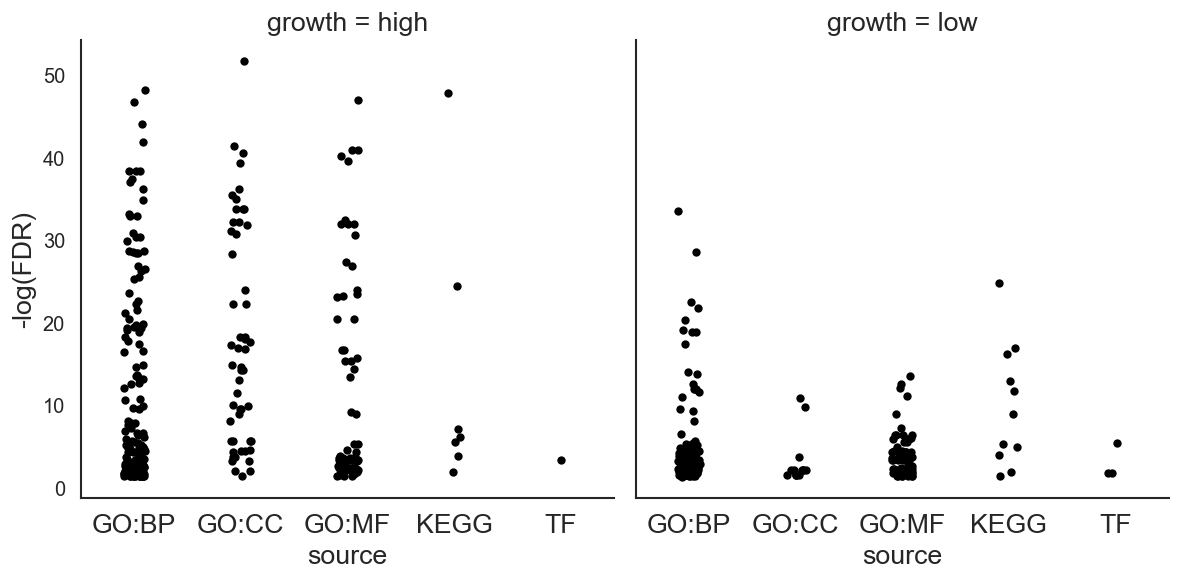

In [28]:
# fig, ax = plt.subplots(1, 1, figsize=(8, 6))

sns.catplot(
    kind='strip',
    data=optimal_df,
    x = 'source',
    y = '-log(FDR)',
    col='growth',
)
# ax.set_yscale(mpl.scale.FuncScale(ax, (custom_scale, custom_scale)))
# ax.set_yscale('log')

In [29]:
optimal_common_df = optimal_df.filter(pl.col('term_id').is_duplicated())

In [30]:
optimal_differential_df = optimal_df.filter(~pl.col('term_id').is_duplicated())

In [31]:
print(optimal_differential_df.filter(pl.col('source') == 'KEGG'))

print("GO Processes", optimal_differential_df.filter(pl.col('source') == 'GO:BP'))

print("GO CC", optimal_differential_df.filter(pl.col('source') == 'GO:CC'))

print("GO MF", optimal_differential_df.filter(pl.col('source') == 'GO:MF'))

shape: (6, 8)
┌────────┬────────────┬───────────────┬───────────┬──────────────┬────────────┬────────┬───────────┐
│ source ┆ term_id    ┆ term_name     ┆ term_size ┆ intersection ┆ adj_pval   ┆ growth ┆ -log(FDR) │
│ ---    ┆ ---        ┆ ---           ┆ ---       ┆ _size        ┆ ---        ┆ ---    ┆ ---       │
│ str    ┆ str        ┆ str           ┆ i64       ┆ ---          ┆ f64        ┆ str    ┆ f64       │
│        ┆            ┆               ┆           ┆ i64          ┆            ┆        ┆           │
╞════════╪════════════╪═══════════════╪═══════════╪══════════════╪════════════╪════════╪═══════════╡
│ KEGG   ┆ KEGG:00190 ┆ Oxidative pho ┆ 79        ┆ 41           ┆ 1.4450e-48 ┆ high   ┆ 47.840124 │
│        ┆            ┆ sphorylation  ┆           ┆              ┆            ┆        ┆           │
│ KEGG   ┆ KEGG:01110 ┆ Biosynthesis  ┆ 351       ┆ 20           ┆ 1.3099e-13 ┆ low    ┆ 12.882777 │
│        ┆            ┆ of secondary  ┆           ┆              ┆           

# ELE genes

In [ ]:
ele_high_df = pl.read_csv("data/enrichment/ intersection_high_strains-ELEGenes .csv")\
    .drop('').with_columns(growth = pl.lit('high'))
ele_low_df = pl.read_csv("data/enrichment/ intersection_low_strains-ELEGenes .csv")\
    .drop('').with_columns(growth = pl.lit('low'))

ele_df = pl.concat([ele_high_df, ele_low_df], how='vertical')
ele_df.sample(10)

In [33]:
ele_common_df = ele_df.filter(pl.col('term_id').is_duplicated())

ele_differential_df = ele_df.filter(~pl.col('term_id').is_duplicated())

In [34]:
print(ele_common_df.filter(pl.col('source') == 'KEGG'))

print("GO Processes", ele_differential_df.filter(pl.col('source') == 'GO:BP'))

print("GO CC", ele_differential_df.filter(pl.col('source') == 'GO:CC'))

print("GO MF", ele_differential_df.filter(pl.col('source') == 'GO:MF'))

shape: (10, 7)
┌────────┬────────────┬───────────────────┬───────────┬───────────────────┬────────────┬────────┐
│ source ┆ term_id    ┆ term_name         ┆ term_size ┆ intersection_size ┆ adj_pval   ┆ growth │
│ ---    ┆ ---        ┆ ---               ┆ ---       ┆ ---               ┆ ---        ┆ ---    │
│ str    ┆ str        ┆ str               ┆ i64       ┆ i64               ┆ f64        ┆ str    │
╞════════╪════════════╪═══════════════════╪═══════════╪═══════════════════╪════════════╪════════╡
│ KEGG   ┆ KEGG:00062 ┆ Fatty acid        ┆ 8         ┆ 4                 ┆ 3.0740e-9  ┆ high   │
│        ┆            ┆ elongation        ┆           ┆                   ┆            ┆        │
│ KEGG   ┆ KEGG:01040 ┆ Biosynthesis of   ┆ 10        ┆ 4                 ┆ 4.6075e-9  ┆ high   │
│        ┆            ┆ unsaturated fatty ┆           ┆                   ┆            ┆        │
│        ┆            ┆ acids             ┆           ┆                   ┆            ┆        │
│ KEG

# MLE genes

In [ ]:
mle_high_df = pl.read_csv("data/enrichment/ intersection_high_strains-MLEGenes .csv")\
    .drop('').with_columns(growth = pl.lit('high'))
mle_low_df = pl.read_csv("data/enrichment/ intersection_low_strains-MLEGenes .csv")\
    .drop('').with_columns(growth = pl.lit('low'))

mle_df = pl.concat([mle_high_df, mle_low_df], how='vertical')
mle_df.shape

In [36]:
mle_common_df = mle_df.filter(pl.col('term_id').is_duplicated())

mle_differential_df = mle_df.filter(~pl.col('term_id').is_duplicated())

In [37]:
print(mle_differential_df.filter(pl.col('source') == 'KEGG'))

print("GO Processes", mle_differential_df.filter(pl.col('source') == 'GO:BP'))

print("GO CC", mle_differential_df.filter(pl.col('source') == 'GO:CC'))

print("GO MF", mle_differential_df.filter(pl.col('source') == 'GO:MF'))

shape: (14, 7)
┌────────┬────────────┬──────────────────────┬───────────┬───────────────────┬────────────┬────────┐
│ source ┆ term_id    ┆ term_name            ┆ term_size ┆ intersection_size ┆ adj_pval   ┆ growth │
│ ---    ┆ ---        ┆ ---                  ┆ ---       ┆ ---               ┆ ---        ┆ ---    │
│ str    ┆ str        ┆ str                  ┆ i64       ┆ i64               ┆ f64        ┆ str    │
╞════════╪════════════╪══════════════════════╪═══════════╪═══════════════════╪════════════╪════════╡
│ KEGG   ┆ KEGG:00380 ┆ Tryptophan           ┆ 20        ┆ 2                 ┆ 0.006008   ┆ high   │
│        ┆            ┆ metabolism           ┆           ┆                   ┆            ┆        │
│ KEGG   ┆ KEGG:00970 ┆ Aminoacyl-tRNA       ┆ 40        ┆ 23                ┆ 1.7003e-21 ┆ low    │
│        ┆            ┆ biosynthesis         ┆           ┆                   ┆            ┆        │
│ KEGG   ┆ KEGG:00100 ┆ Steroid biosynthesis ┆ 18        ┆ 13               

In [ ]:
annotations_df = pl.read_csv(
    "data/bloom2013_annotations.tab",
    separator="\t",
).drop([' Distance ', ' ERRORS / WARNINGS / INFO'])

annotations_df = annotations_df.rename(
    {
        col: col.strip() for col in annotations_df.columns
    }
)

In [39]:
annotations_df['Annotation'].value_counts()

Annotation,counts
str,u32
"""frameshift_variant""",3
"""stop_gained""",270
"""splice_region_variant&non_coding_transcript_exon_…",2
"""stop_lost&splice_region_variant""",12
"""frameshift_variant&splice_region_variant""",1
"""non_coding_transcript_exon_variant""",54
"""initiator_codon_variant""",1
"""conservative_inframe_insertion""",1
"""missense_variant""",4381


In [40]:
annotations_df.filter(
    pl.col('Annotation').str.contains("stop")
)

CHROM,POS,ID,REF,ALT,QUAL,FILTER,Allele,Annotation,Annotation_Impact,Gene_Name,Gene_ID,Feature_Type,Feature_ID,Transcript_BioType,Rank,HGVS.c,HGVS.p,cDNA.pos / cDNA.length,CDS.pos / CDS.length,AA.pos / AA.length
str,i64,i64,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""I""",59977,76,"""T""","""C""",0,null,"""C""","""stop_gained""","""HIGH""","""PTA1""","""YAL043C""","""transcript""","""YAL043C_mRNA""","""protein_coding""","""01-Jan""","""c.1076A>G""","""p.Ser359*""","""1076/2358""","""1076/2358""","""359/785"""
"""I""",131983,91,"""C""","""T""",0,null,"""T""","""stop_lost&splice_region_variant""","""HIGH""","""CYS3""","""YAL012W""","""transcript""","""YAL012W_mRNA""","""protein_coding""","""01-Jan""","""c.1185C>T""","""p.Ter395Tyrext*?""","""1185/1185""","""1185/1185""","""395/394"""
"""I""",173220,137,"""A""","""C""",0,null,"""C""","""stop_gained""","""HIGH""","""CDC15""","""YAR019C""","""transcript""","""YAR019C_mRNA""","""protein_coding""","""01-Jan""","""c.1916T>G""","""p.Leu639*""","""1916/2925""","""1916/2925""","""639/974"""
"""I""",184475,168,"""C""","""A""",0,null,"""A""","""stop_lost&splice_region_variant""","""HIGH""","""UIP3""","""YAR027W""","""transcript""","""YAR027W_mRNA""","""protein_coding""","""01-Jan""","""c.706C>A""","""p.Ter236Lysext*?""","""706/708""","""706/708""","""236/235"""
"""I""",185432,170,"""C""","""T""",0,null,"""T""","""stop_gained""","""HIGH""","""YAR028W""","""YAR028W""","""transcript""","""YAR028W_mRNA""","""protein_coding""","""01-Jan""","""c.541C>T""","""p.Gln181*""","""541/705""","""541/705""","""181/234"""
"""II""",148175,289,"""C""","""T""",0,null,"""T""","""stop_gained""","""HIGH""","""APL3""","""YBL037W""","""transcript""","""YBL037W_mRNA""","""protein_coding""","""01-Jan""","""c.967C>T""","""p.Gln323*""","""967/3078""","""967/3078""","""323/1025"""
"""II""",158803,303,"""G""","""T""",0,null,"""T""","""stop_gained""","""HIGH""","""RIB1""","""YBL033C""","""transcript""","""YBL033C_mRNA""","""protein_coding""","""01-Jan""","""c.891C>A""","""p.Tyr297*""","""891/1038""","""891/1038""","""297/345"""
"""II""",163183,314,"""C""","""T""",0,null,"""T""","""stop_gained""","""HIGH""","""PET9""","""YBL030C""","""transcript""","""YBL030C_mRNA""","""protein_coding""","""01-Jan""","""c.815G>A""","""p.Leu272*""","""815/957""","""815/957""","""272/318"""
"""II""",205154,395,"""G""","""A""",0,null,"""A""","""stop_gained""","""HIGH""","""SCT1""","""YBL011W""","""transcript""","""YBL011W_mRNA""","""protein_coding""","""01-Jan""","""c.1617G>A""","""p.Tyr539*""","""1617/2280""","""1617/2280""","""539/759"""


In [41]:
annotations_df.filter(
    pl.col('Gene_ID') == 'YEL068C'
)

CHROM,POS,ID,REF,ALT,QUAL,FILTER,Allele,Annotation,Annotation_Impact,Gene_Name,Gene_ID,Feature_Type,Feature_ID,Transcript_BioType,Rank,HGVS.c,HGVS.p,cDNA.pos / cDNA.length,CDS.pos / CDS.length,AA.pos / AA.length
str,i64,i64,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""V""",25874,2576,"""A""","""C""",0,null,"""C""","""missense_variant""","""MODERATE""","""YEL068C""","""YEL068C""","""transcript""","""YEL068C_mRNA""","""protein_coding""","""01-Jan""","""c.105T>G""","""p.Phe35Leu""","""105/333""","""105/333""","""35/110"""


# Varying genes in pFBAoptima

In [32]:
optima_high = intersection_genes_high['pFBAoptima'].astype(str)
optima_low = intersection_genes_low['pFBAoptima'].astype(str)

In [33]:
optimal_low_unique = np.setdiff1d(optima_low, optima_high, assume_unique=True)
optimal_high_unique = np.setdiff1d(optima_high, optima_low, assume_unique=True)
intersection_optimal = np.intersect1d(optima_high, optima_low)

In [34]:
for gene in intersection_optimal:
    print(gene)

In [35]:
for gene_type in intersection_genes_low:
    print(gene_type, ":", jaccard(optimal_high_unique, intersection_genes_low[gene_type]))

pFBAEssential : 0.0
pFBAoptima : 0.0
ELEGenes : 0.0
MLEGenes : 0.0
ZeroFluxGenes : 0.0
Blockedgenes : 0.0


In [36]:
all_genes = np.array([])
for gene_type in intersection_genes_low:
    all_genes = np.union1d(all_genes, intersection_genes_low[gene_type])
    
print(len(all_genes))

567


In [37]:
all_genes_high = np.array([])
for gene_type in intersection_genes_high:
    all_genes_high = np.union1d(all_genes_high, intersection_genes_high[gene_type])
    
print(len(all_genes_high))


795


In [ ]:
# savemat("results/high_strains_gimme_sigma_0.5.mat", {"high_strains": high_strains.to_list()})
# savemat("results/low_strains_gimme_sigma_0.5.mat", {"low_strains": low_strains.to_list()})

In [40]:
all_genes_high_common = np.array([])
for gene_type in common_genes_high:
    all_genes_high_common = np.union1d(all_genes_high_common, common_genes_high[gene_type])
    
print(len(all_genes_high_common))

1163


In [41]:
all_genes_low_common = np.array([])
for gene_type in common_genes_low:
    all_genes_low_common = np.union1d(all_genes_low_common, common_genes_low[gene_type])
    
print(len(all_genes_low_common))

1163


In [42]:
# Comparing with the common genes

for gene_type in common_genes_high:
    print(gene_type, ":", jaccard(optimal_high_unique, common_genes_low[gene_type]))

pFBAEssential : 0.0055248618784530384
pFBAoptima : 0.44660194174757284
ELEGenes : 0.21553398058252426
MLEGenes : 0.18098159509202455
ZeroFluxGenes : 0.0
Blockedgenes : 0.008412197686645636


In [56]:
# for gene_type in gene_types:
#     print( gene_type)
#     for strain in genes_solution.keys():
#         if strain in low_strains:
#             score = jaccard(optimal_high_unique, genes_solution[strain][gene_type])
#             if score != 0:
#                 print(strain, score)
            

In [ ]:
# optimal_high_unique.tofile("results/gimme_pfba/sigma_0.5/Intersection/Optimal_genes/genes_high_unique.txt", sep='\n', format='%s')

In [ ]:
geno_df = pl.read_csv("data/bloom2013_genotype_concordant_strains.csv")
geno_df

In [55]:
geno_df.select(
    pl.col('Strain'),
    cs.contains(optimal_high_unique)
).filter(pl.col('Strain').is_in(high_strains)).columns

['Strain',
 'YBL030C',
 'YDL004W',
 'YDL067C',
 'YDR529C',
 'YEL024W',
 'YGL191W',
 'YGR062C',
 'YJL121C',
 'YJR077C',
 'YJR121W',
 'YMR056C',
 'YOR065W',
 'YPL078C',
 'YPR191W']

# Varying genes in Essential genes

In [43]:
essential_high = intersection_genes_high['pFBAEssential'].astype(str)
essential_low = intersection_genes_low['pFBAEssential'].astype(str)

In [44]:
essential_high_unique = np.setdiff1d(essential_high, essential_low, assume_unique=True)
essential_low_unique = np.setdiff1d(essential_low, essential_high, assume_unique=True)
intersection_essential = np.intersect1d(essential_high, essential_low)

In [45]:
for gene in essential_high_unique:
    print(gene)

YCR028C
YGR260W
YOL064C
YOR175C
YOR209C
YOR306C
YPL262W


In [47]:
essential_low_unique

array([], dtype='<U9')